# CORDIC Algorithm
**CO**ordinate **R**otation **DI**gital **C**omputer (CORDIC) is an algorithm which uses rotation of vector to calculate trignometric and hyperbolic functions. CORDIC algorithms as in present forms were first described by Volder in 1959 in his paper *The CORDIC Trigonometric Computing Technique*. They were first developed to replace analog resolver in B-58 bombers with digital solution.

## Working
CORDIC algorithms works on the principle of rotation of vector. CORDIC algrithms are based on the fact that rotation of a vector in eucledian space are dependent on **sine** and **cosine** of rotation angle. Based on this CORDIC algorithms usually works by rotating vector similar to a damping motion of a pendulumn till it reaches desired angular value (usually $0^o$).

Since CORDIC algorithms operate in different modes and coordinate systems to produce different results, it is easier to analyse their behaviour separetly. 

Generally CORDIC algorithms are classified into two mode of operation:
1. Rotation Mode
2. Vector Mode

## Basics of CORDIC algorithm

CORDIC algorithms exploit the fact that on rotation of a vector ((0, 0)$\rightarrow$ (x, y)) by $\theta^o$ new co-ordinates of a vector are:

\begin{equation}
    x' = x\cos(\phi) - y\sin(\phi)
\end{equation}
\begin{equation}
    y' = x\sin(\phi) + y\cos(\phi)
\end{equation}

Using basic trignometric identies these equations can be shown to be equivalent to:

\begin{equation}
    x' = A\cdot(x - y\tan(\phi))
\end{equation}
\begin{equation}
    y' = A\cdot(x\tan(\phi) + y)
\end{equation}

\begin{equation}
A = \frac{1}{\sqrt{1+\tan^2(\phi)}}
\end{equation}
\begin{equation}...[Eq 1.1]\end{equation}

These equations can be seperated into two parts, A which scales the magnitude of vector and rest of the part which performs vector rotation. If we get rid of A these set of equations will perform psuedo rotations.

If instead of single $-\theta^\circ$ rotation vector are rotated through multiple angles which sums to $-\theta^\circ$. 

In current form these equations require multipliers but if we restrict each of the iteration to an angle such that $\tan{(\phi_i)} = 2^{-i}$. In iterative form equations now are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


<img src="varArcTan.png" width="500" height="500" />

One thing that is worth noticing is for increase in value of i, decrease in value of $tan^{-1}(2^{-i})$ is less than half of $tan^{-1}(2^{-(i-1)})$. Or mathematically:

\begin{equation}
tan^{-1}(2^{-(i)}) \geq \frac{1}{2} tan^{-1}(2^{-(i+1)})
\end{equation}

This is very important for convergence of value in either of the mode, if value of does not convergence in specific case we'll have to repeat certain iterations to get convergence.

# Modes of CORDIC Algorithms
CORDIC algorithms is usualy operated in one of the following two modes:
* **Rotation mode** 
* **Vector mode**


## Rotation Mode
Instead of performing rotation by an angle in one go, multiple small rotations are performed over number of iterations. After each iteration total sum of rotation is equal to the desired angle. 
In rotation mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in rotation mode are:

\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}

\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}

\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

here Z is also known as angle accumulator since at the end of iterations Z accumulates all the rotations performed

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then

\begin{equation}
    x_{n} = A_{n} \cdot [ x_{0} \cdot cos z_{0} - y_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    x_{n} = A_{n} \cdot [ y_{0} \cdot cos z_{0} + x_{0} \cdot sin z_{0} ]      
\end{equation}

\begin{equation}
    z_{n} = 0
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

Equations used above are for circular coordinate system for rest of the co-ordinate system results are summarised in the table below:

\begin{array}{|l|l|l|l|l|l|l|}
\hline
Coordinate~System & x_{in} & y_{in} & z_{in} & x_{out}    & y_{out}    & z_{out} \\ \hline
Linear            & x      & 0      & z      & x          & x*z        & 0       \\ \hline
Circular          & 0.6073 & 0      & z      & \cos{(z)}  & \sin{(z)}   & 0       \\ \hline
Hyperbolic        & 1.2075 & 0      & z      & \cosh{(z)} & \sinh{(z)} & 0       \\ \hline
\end{array}

### Imports and global declarations

General import statements, we'll use matplotlib to plot graphs

In [ ]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import math
import string
import struct

from __future__ import division

Variables to identify circular, linear and hyperbolic mode

In [ ]:
circular = 1
linear = 0
hyperbolic = -1

Method to plot values

In [ ]:
def plot(x_values, y_values, x_label, y_label, plot_label):
    # Plot of Value of gain with number of iterations
    fig = plt.figure();
    ax = fig.add_subplot(111);

    line, = ax.plot(x_values, y_values,  lw=2)

    ax.set_title(plot_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    plt.show()
    plt.close()
    return

### Value of $A_{n}$ as $n \rightarrow \infty$

In [ ]:
gain_val_list = [math.sqrt(2)]  # Stores value of gain after each iteration 
max_iter_gain = 10              # Max number of iterations for calculating value of gain
iterations_list = [0]           # List that Stores the number of iterations performed

for i in range (1, max_iter_gain):
    gain_val_list.append(gain_val_list[i-1] * math.sqrt(1 + 2**(-2 * i)))
    iterations_list.append(i)

# Plot for value of gain with each iteration
plot(iterations_list, gain_val_list, 'Iterations (i) $\\rightarrow$', 'Gain $A_{n}$ $\\rightarrow$',
     'Variation of A$_{n}$ with number of iterations')
print "Gain of the system is " + str(gain_val_list[len(gain_val_list) - 1])

As evident from the plot above $A_{n} \approx 1.647$ as $n \rightarrow \infty$. $A_{n}$ is also refered as the gain of the system.

In [ ]:
a = 0.607252935         # inverse of gain 1 / An

### Python implementation of Rotation mode
Returns dictionary containing one list for each x, y, z and iterations 

`ROM_lookup` provides values of constant required for each coordinate system based on iteration count

In [ ]:
def ROM_lookup(iteration, coordinate):
    if (coordinate == circular):
        return math.degrees(math.atan(2**(-1*iteration)))
    elif (coordinate == linear):
        return 2**(-1*iteration)
    elif (coordinate == hyperbolic):
        return (math.atanh(2**(-1*iteration)))

`Rotation_mode` returns dictionary of list containing x, y and z values for each iteration

In [ ]:
def rotation_mode(x, y, z, coordinate, iterations):
    a = 0.607252935;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            if (current_z < 0):
                di = -1
            else:
                di = +1
            next_z = current_z - di * ROM_lookup(i, coordinate)
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list, }

Next parameters given to `rotation_mode` are specified to get corresponding results, here *Circular mode* is used so the results are $x=\cos(\theta)$, $y=\sin(\theta)$ and $z=0$.

In [ ]:
angle = 60 # degrees
crd_sys = circular
max_iter = 20

In [ ]:
result_dict = rotation_mode(a, 0, angle, crd_sys, max_iter)

### Plot of $x_i$

In [ ]:
plot(result_dict['iteration'], result_dict['x'], 'Iterations $\\rightarrow$', 'cos z$_{0}$ $\\rightarrow$', '')
print result_dict['x'][max_iter-1]

### Plot of $y_i$

In [ ]:
plot(result_dict['iteration'], result_dict['y'], 'Iterations $\\rightarrow$', 'sin z$_{0}$ $\\rightarrow$', '')
print result_dict['y'][max_iter-1]

### Plot of $z_i$

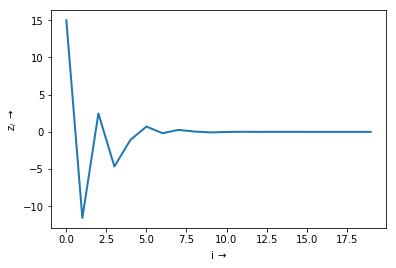

6.98729840751e-05


In [210]:
plot(result_dict['iteration'], result_dict['z'], 'i $\\rightarrow$', 'z$_{i}$ $\\rightarrow$', '')
print result_dict['z'][max_iter-1]

# Vector mode
In vector mode vector is initialised with given angle, on each further iteration the value of angle is reduced by rotating the vector by fixed amount.

Equations used in vector mode are (same as rotation mode):


\begin{equation}
    x_{i+1} = x_{i} - y_{i} \cdot d_{i} \cdot 2^{-i}      
\end{equation}


\begin{equation}
    y_{i+1} = y_{i} + x_{i} \cdot d_{i} \cdot 2^{-i}
\end{equation}

\begin{equation}
    z_{i+1} = Z_{i} - d_{i} \cdot tan^{-1}(2^{-i})     
\end{equation}


\begin{equation}
^{(for \space i^{th} \space iteration)}
\end{equation}

Value of $d_{i}$ is chosen such that z reduces at each iteration. Thus after n iterations if z = 0 then


\begin{equation}
    x_{n} = A_{n} \sqrt{ x_{0}^{2} - y_{0}^{2} }
\end{equation}

\begin{equation}
    y_{n} = 0
\end{equation}

\begin{equation}
    z_{n} = z_{0} + tanh^{-1}( \dfrac{y_{0}}{x_{0}} )
\end{equation}

where 

\begin{equation}
    A_{n} = {\displaystyle \prod_{i=0} ^{n}} \sqrt{1+2^{-2i}}
\end{equation}

In [ ]:
def vector_mode(x, y, z, coordinate, iterations):
    a = 1.2075;   # = 1/K
    
    x_val_list = []
    y_val_list = []
    z_val_list = []
    iterations_list = []

    i = 0;                  # Keeps count on number of iterations
    
    current_x = x         # Value of X on ith iteration 
    current_y = y         # Value of Y on ith iteration
    current_z = z         # Value of Z on ith iteration
    
    di = 0
    
    # This is neccesary since result for i=0 doesn't exists for hyperbolic 
    # co-ordinate system.
    if (coordinate == hyperbolic):
        i = 1
    else:
        i = 0
        
    flag = 0
    
    if (iterations > 0):
        while (i < iterations):
            di = -1*math.copysign(1, current_y);#*current_x);
            next_x = current_x - coordinate * di * current_y * (2**(-1*i))
            next_y = current_y + di * current_x * 2**(-1*i)
            next_z = current_z - di * ROM_lookup(i, coordinate)
            
            current_x = next_x
            current_y = next_y
            current_z = next_z

            x_val_list.append(current_x)
            y_val_list.append(current_y)
            z_val_list.append(current_z)
            
            iterations_list.append(i)
            
            if (coordinate == hyperbolic):
                if ((i != 4) & (i != 13) & (i!=40)):
                    i = i+1
                elif (flag == 0):
                    flag = 1
                elif (flag == 1):
                    flag = 0
                    i = i+1
            else:
                i = i+1
    return { 'x':x_val_list, 'y':y_val_list, 'z':z_val_list, 'iteration':iterations_list }

## Calculations for magnitude of vector

In [ ]:
vect_x = 2
vect_y = 1
vect_z = 0
crd_sys = circular
max_iter = 20

In [ ]:
result_dict_vect = vector_mode(vect_x, vect_y, vect_z, crd_sys, max_iter)

## Plot for tan$^{-1}$(y) with number of iterations

### Plot of $x_i$

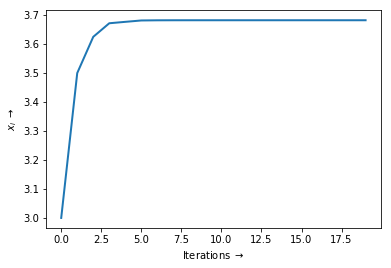

3.6822678798


In [211]:
plot(result_dict_vect['iteration'], result_dict_vect['x'], 'Iterations $\\rightarrow$', '$x_i$ $\\rightarrow$', '')
print result_dict_vect['x'][max_iter-1]

### Plot of $y_i$

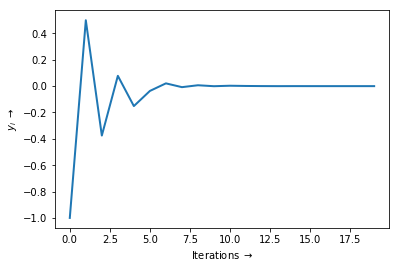

-6.84600547108e-06


In [212]:
plot(result_dict_vect['iteration'], result_dict_vect['y'], 'Iterations $\\rightarrow$', '$y_i$ $\\rightarrow$', '')
print result_dict_vect['y'][max_iter-1]

### Plot of $z_i$

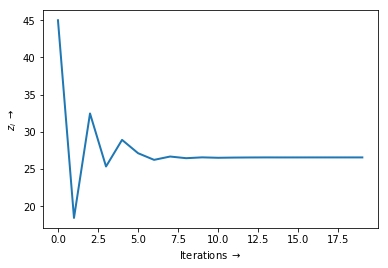

26.5651577003


In [213]:
plot(result_dict_vect['iteration'], result_dict_vect['z'], 'Iterations $\\rightarrow$', '$z_i$ $\\rightarrow$', '')
print result_dict_vect['z'][max_iter-1]

# References
1. [*A survey of CORDIC algorithms for FPGA based computers*](http://portal.acm.org/citation.cfm?doid=275107.275139) by Andraka, Ray (1998).
2. *Cordic Architeutre - QIP STC-Image Processing using VLSI architecture* by Das, Bishnu Prasad (2016).
3. Wikibooks contributors, "[*Digital Circuits/CORDIC*](https://en.wikibooks.org/w/index.php?title=Digital_Circuits/CORDIC&oldid=3048211)," Wikibooks, The Free Textbook Project, (accessed
June 8, 2017). 